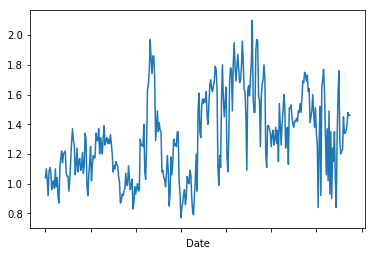

In [2]:
import pandas as pd
df = pd.read_csv("datasets/avocado.csv")
indianapolis_df = df.copy()[df['region'] == 'Indianapolis']
indianapolis_df.set_index("Date", inplace=True)
indianapolis_df['AveragePrice'].plot()

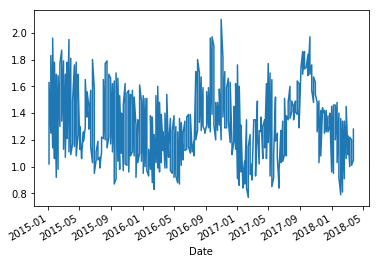

In [3]:
df['Date'] = pd.to_datetime(df["Date"])
indianapolis_df = df.copy()[df['region'] == 'Indianapolis']
indianapolis_df.set_index("Date", inplace=True)
indianapolis_df['AveragePrice'].plot()

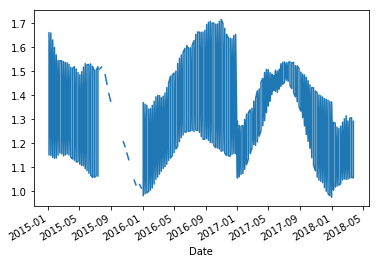

In [4]:
indianapolis_df['AveragePrice'].rolling(25).mean().plot()

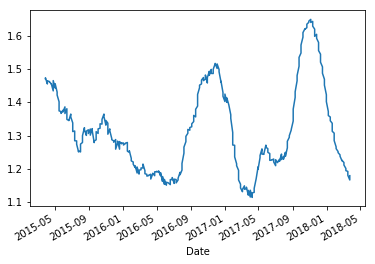

In [5]:
indianapolis_df.sort_index(inplace=True)
indianapolis_df['AveragePrice'].rolling(25).mean().plot()

In [6]:
df = pd.read_csv("datasets/avocado.csv")
df_organic = df.copy()[df['type']=='organic']
df_organic['Date'] = pd.to_datetime(df_organic['Date'])
df_organic.sort_values(by="Date", ascending=True, inplace=True)

df_conventional = df.copy()[df['type']=='conventional']
df_conventional['Date'] = pd.to_datetime(df_conventional['Date'])
df_conventional.sort_values(by="Date", ascending=True, inplace=True)

In [7]:
graph_df_organic = pd.DataFrame()
for region in df_organic['region'].unique():
    region_df = df_organic.copy()[df_organic['region'] == region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df_organic.empty:
        graph_df_organic = region_df[[f'{region}_price25ma']]
    else:
        graph_df_organic = graph_df_organic.join(region_df[f'{region}_price25ma'])
        
graph_df_conventional = pd.DataFrame()
for region in df_conventional['region'].unique():
    region_df = df_conventional.copy()[df_conventional['region'] == region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df_conventional.empty:
        graph_df_conventional = region_df[[f'{region}_price25ma']]
    else:
        graph_df_conventional = graph_df_conventional.join(region_df[f'{region}_price25ma'])

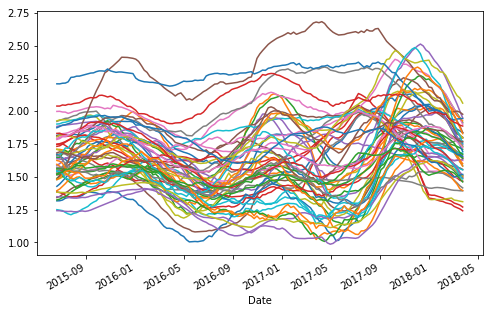

In [11]:
graph_df_organic.dropna().plot(figsize=(8,5),legend=False)

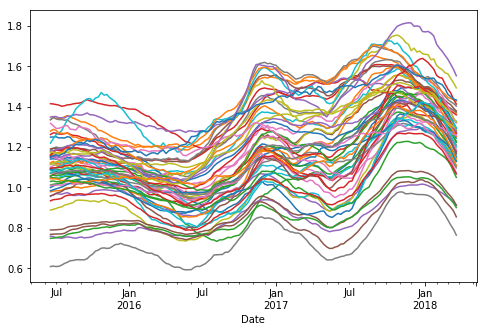

In [12]:
graph_df_conventional.dropna().plot(figsize=(8,5),legend=False)

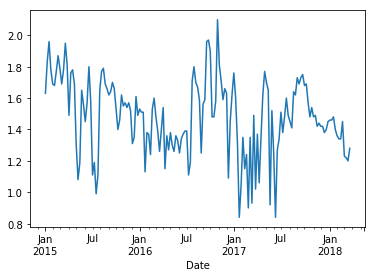

In [9]:
indianapolis_df_organic = df_organic.copy()[df_organic['region']=="Indianapolis"]
#indianapolis_df_organic['Date'] = pd.to_datetime(indianapolis_df_organic['Date'])
indianapolis_df_organic.set_index("Date", inplace=True)
indianapolis_df_organic.sort_index(inplace=True)
indianapolis_df_organic['AveragePrice'].plot()
#indianapolis_df_organic.head()

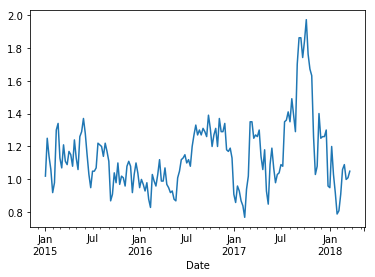

In [10]:
indianapolis_df_conventional = df_conventional.copy()[df_conventional['region']=="Indianapolis"]
indianapolis_df_conventional.set_index("Date", inplace=True)
indianapolis_df_conventional['AveragePrice'].plot()